### Part 1. 1 a - Read the ‘Signals.csv’ as DataFrame and import required libraries.

In [109]:
import pandas as pd
# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [110]:
signal_data = pd.read_excel("Q1Q2Q3_OR_FM_merged.xlsx")

In [111]:
signal_data = signal_data.drop("TIME",axis=1)

In [112]:
signal_data.head()

,CASING,C_TEMP,IMPELLER,I_TEMP,BEARING,B_TEMP,FLOW,PRESSURE,DC_RA,CURRENT,VOLTAGE,CONDITION
0,491.0,28,492.0,29,484.0,31,158.4,28.1,4.332,1.85,142,GHC
1,493.0,28,496.0,29,497.0,31,158.4,30.5,4.332,1.85,142,GHC
2,497.0,28,488.0,29,490.0,31,158.4,28.1,4.332,1.85,142,GHC
3,493.0,28,481.0,29,494.0,31,158.4,29.3,4.332,1.85,142,GHC
4,488.0,28,480.0,29,495.0,31,158.4,29.3,4.332,1.85,142,GHC


In [113]:
signal_data.tail()

,CASING,C_TEMP,IMPELLER,I_TEMP,BEARING,B_TEMP,FLOW,PRESSURE,DC_RA,CURRENT,VOLTAGE,CONDITION
70057,788.0,28,890.0,29,704.0,31,153.6,12.2,2.34,1.85,291,GHC
70058,799.0,28,855.0,29,700.0,31,148.8,12.2,2.34,1.85,291,GHC
70059,806.0,28,793.0,29,781.0,31,153.6,12.2,2.34,1.85,291,GHC
70060,762.0,28,815.0,29,762.0,31,148.8,11.0,2.34,1.85,291,GHC
70061,772.0,28,793.0,29,764.0,31,153.6,12.2,2.34,1.85,291,GHC


### Part 1.1 b - Check for missing values and print percentage for each attribute.

In [114]:
# Let's check for missing values in the data
round(signal_data.isnull().sum() / signal_data.isnull().count() * 100, 2)

CASING       0.0
C_TEMP       0.0
IMPELLER     0.0
I_TEMP       0.0
BEARING      0.0
B_TEMP       0.0
FLOW         0.0
PRESSURE     0.0
DC_RA        0.0
CURRENT      0.0
VOLTAGE      0.0
CONDITION    0.0
dtype: float64

In [115]:
missing_values = ["n/a", "na", "--", " ","?","-"]
percent_missing = signal_data.isin(missing_values).sum()* 100 / len(signal_data)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

,percent_missing
CASING,0.0
C_TEMP,0.0
IMPELLER,0.0
I_TEMP,0.0
BEARING,0.0
B_TEMP,0.0
FLOW,0.0
PRESSURE,0.0
DC_RA,0.0
CURRENT,0.0


No missing Value in dataframe

### Part 1.1 c - Check for presence of duplicate records in the dataset and impute with appropriate method

In [116]:
# Let's check for duplicate values in the data
signal_data.duplicated().sum()

14774

In [117]:
signal_data.shape

(70062, 12)

In [118]:
duplicate_df = signal_data[signal_data.duplicated()]
 
print("Duplicate Rows :")

duplicate_df

Duplicate Rows :


,CASING,C_TEMP,IMPELLER,I_TEMP,BEARING,B_TEMP,FLOW,PRESSURE,DC_RA,CURRENT,VOLTAGE,CONDITION
182,493.0,28,488.0,29,483.0,31,158.4,29.3,4.332,1.85,142,GHC
224,495.0,28,491.0,29,492.0,31,158.4,29.3,4.332,1.85,142,GHC
247,491.0,28,496.0,29,491.0,31,158.4,29.3,4.332,1.85,142,GHC
275,494.0,28,491.0,29,497.0,31,158.4,29.3,4.332,1.85,142,GHC
277,492.0,28,495.0,29,491.0,31,158.4,29.3,4.332,1.85,142,GHC
...,...,...,...,...,...,...,...,...,...,...,...,...
65790,787.0,28,942.0,29,765.0,31,153.6,12.2,2.340,1.85,291,GHC
67449,790.0,28,726.0,29,780.0,31,153.6,12.2,2.340,1.85,291,GHC
67872,795.0,28,719.0,29,740.0,31,148.8,12.2,2.340,1.85,291,GHC
69217,775.0,28,835.0,29,775.0,31,148.8,12.2,2.340,1.85,291,GHC


In [119]:
signal_data= signal_data.drop_duplicates()

In [120]:
print ("The shape of Total no of Duplicates in DataFrame ", duplicate_df.shape)
print ("The shape of data frame after removing Duplicates", signal_data.shape)


The shape of Total no of Duplicates in DataFrame  (14774, 12)
The shape of data frame after removing Duplicates (55288, 12)


### Part 1.1 d- Visualise distribution of the target variable.

In [121]:
import matplotlib.pyplot as plt 
import seaborn as sns 

In [122]:
signal_data["CONDITION"].value_counts()

GHC    16846
IBF    15000
IF     14999
MA      8443
Name: CONDITION, dtype: int64

<AxesSubplot:>

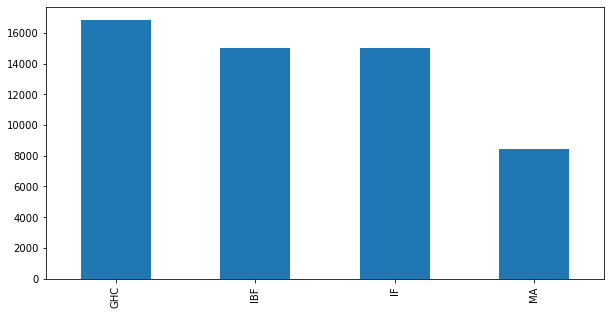

In [123]:
fig = plt.figure(figsize =(10, 5))
signal_data['CONDITION'].value_counts().plot.bar()

<AxesSubplot:ylabel='CONDITION'>

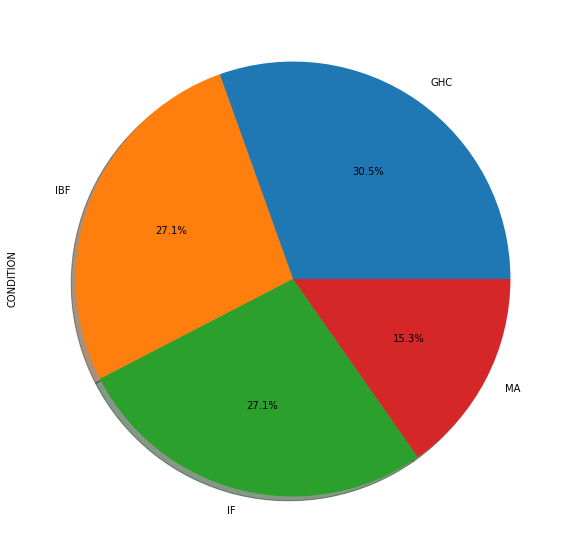

In [124]:
fig = plt.figure(figsize =(10, 10))
signal_data['CONDITION'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,)

In [125]:
signal_data['CONDITION'].replace(['GHC', 'IF','IBF','MA'],
                        [0, 1,2,3], inplace=True)

### Part 1.1 e- - Share insights from the initial data analysis (at least 2).

In [126]:
signal_data.describe()

,CASING,C_TEMP,IMPELLER,I_TEMP,BEARING,B_TEMP,FLOW,PRESSURE,DC_RA,CURRENT,VOLTAGE,CONDITION
count,55288.000000,55288.000000,55288.000000,55288.000000,55288.000000,55288.000000,55288.000000,55288.000000,55288.000000,55288.000000,55288.000000,55288.000000
mean,369.259326,28.814155,355.277057,29.272012,367.978667,37.410849,136.774562,17.442544,3.747684,1.639011,172.407611,1.272030
std,197.034655,1.400032,224.682857,1.351899,194.342306,4.525849,14.943026,6.897465,0.921077,0.311715,52.702964,1.054922
min,182.426667,27.000000,154.080000,26.000000,168.013333,31.000000,110.400000,11.000000,2.340000,1.350000,142.000000,0.000000
25%,219.146667,28.000000,175.720000,29.000000,209.943333,31.000000,120.000000,12.200000,2.340000,1.350000,142.000000,0.000000
50%,231.400000,28.000000,183.133333,29.000000,223.000000,40.000000,144.000000,13.500000,4.332000,1.350000,142.000000,1.000000
75%,490.000000,31.000000,487.533333,30.000000,480.533333,41.000000,148.800000,20.800000,4.332000,1.890000,217.000000,2.000000
max,829.000000,31.000000,955.000000,32.000000,836.000000,43.000000,158.400000,36.600000,4.466000,2.230000,291.000000,3.000000


In [127]:
signal_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55288 entries, 0 to 70061
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CASING     55288 non-null  float64
 1   C_TEMP     55288 non-null  int64  
 2   IMPELLER   55288 non-null  float64
 3   I_TEMP     55288 non-null  int64  
 4   BEARING    55288 non-null  float64
 5   B_TEMP     55288 non-null  int64  
 6   FLOW       55288 non-null  float64
 7   PRESSURE   55288 non-null  float64
 8   DC_RA      55288 non-null  float64
 9   CURRENT    55288 non-null  float64
 10  VOLTAGE    55288 non-null  int64  
 11  CONDITION  55288 non-null  int64  
dtypes: float64(7), int64(5)
memory usage: 5.5 MB


1) Signals generated need to be normalized and scaled as they are in different range as well as you can observe parameters like 7 which is skewed too.

2) The Target variable signal ranges between 5-6 has captured almost 82% of data.

### Part 1.2 a - Split the data into X & Y..

In [128]:
import sklearn
from sklearn.model_selection import train_test_split

# Independent variables
X=signal_data.drop('CONDITION',axis=1)  

# Target variable
Y=signal_data['CONDITION']               



### Part 1.2 b - Split the data into train & test with 70:30 proportion.

In [129]:
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X, Y, train_size=0.7, random_state=42)

### Part 1.2 c - Print shape of all the 4 variables and verify if train and test data is in sync.

In [130]:
print(X_Train.shape)
print(X_Test.shape)
print(Y_Train.shape)
print(Y_Test.shape)

(38701, 11)
(16587, 11)
(38701,)
(16587,)


### Part 1.2 d - Normalise the train and test data with appropriate method..

In [131]:
from sklearn.preprocessing import StandardScaler

# Scaling train data
X_Train_S = StandardScaler().fit_transform(X_Train) 

# Scaling test data
X_Test_S = StandardScaler().fit_transform(X_Test)     

### Part 1.2 e - Transform Labels into format acceptable by Neural Network

In [132]:
# Converting y data into categorical (one-hot encoding)
from keras.utils.np_utils import to_categorical
Y_Train = to_categorical(Y_Train)
Y_Test = to_categorical(Y_Test) 

### Part 1.3 a - Design a Neural Network to train a classifier.

In [133]:
from keras.models import Sequential # Forward prop
from keras.layers import Dense, Activation, LeakyReLU
from keras import optimizers

NN_model_Classifier_SGD = Sequential()

# The Input Layer :
NN_model_Classifier_SGD.add(Dense(128, kernel_initializer='normal',input_dim = X_Train_S.shape[1], activation='relu'))

# The Hidden Layers :
NN_model_Classifier_SGD.add(Dense(64, kernel_initializer='normal',activation='relu'))  # sigmoid, tanh

NN_model_Classifier_SGD.add(Dense(32, kernel_initializer='normal'))
NN_model_Classifier_SGD.add(LeakyReLU(alpha=0.1))

NN_model_Classifier_SGD.add(Dense(16, kernel_initializer='normal'))
NN_model_Classifier_SGD.add(LeakyReLU(alpha=0.1))


# The Output Layer :
NN_model_Classifier_SGD.add(Dense(4, kernel_initializer='normal',activation='softmax'))  # except softmax

# Compile the network :
NN_model_Classifier_SGD.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
NN_model_Classifier_SGD.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               1536      
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 32)                0         
                                                                 
 dense_18 (Dense)            (None, 16)                528       
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 16)                0         
                                                                 
 dense_19 (Dense)            (None, 4)                

### Part 1.3 b - Train the classifier using previously designed Architecture

In [134]:
EPOCH=20
Network_Classifier_SGD=NN_model_Classifier_SGD.fit(X_Train_S, Y_Train, validation_data=(X_Test_S,Y_Test), epochs=EPOCH, batch_size=100)

Epoch 1/20
388/388 [==============================] - 1s 2ms/step - loss: 1.3711 - accuracy: 0.3021 - val_loss: 1.3621 - val_accuracy: 0.3076
Epoch 2/20
388/388 [==============================] - 1s 2ms/step - loss: 1.3595 - accuracy: 0.3035 - val_loss: 1.3573 - val_accuracy: 0.3076
Epoch 3/20
388/388 [==============================] - 1s 2ms/step - loss: 1.3569 - accuracy: 0.3035 - val_loss: 1.3559 - val_accuracy: 0.3076
Epoch 4/20
388/388 [==============================] - 1s 2ms/step - loss: 1.3559 - accuracy: 0.3035 - val_loss: 1.3551 - val_accuracy: 0.3076
Epoch 5/20
388/388 [==============================] - 1s 2ms/step - loss: 1.3550 - accuracy: 0.3035 - val_loss: 1.3540 - val_accuracy: 0.3076
Epoch 6/20
388/388 [==============================] - 1s 2ms/step - loss: 1.3534 - accuracy: 0.3035 - val_loss: 1.3517 - val_accuracy: 0.3076
Epoch 7/20
388/388 [==============================] - 1s 2ms/step - loss: 1.3495 - accuracy: 0.3035 - val_loss: 1.3452 - val_accuracy: 0.3076
Epoch 

### Part 1.3 c - Plot 2 separate visuals.

i) Training Loss and Validation Loss

ii) Training Accuracy and Validation Accuracy

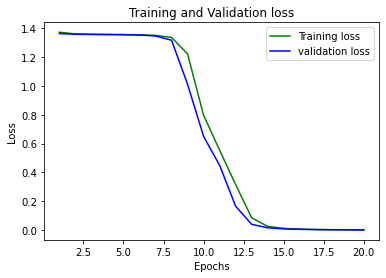

In [135]:
loss_train_SGD = Network_Classifier_SGD.history['loss']
loss_val_SGD = Network_Classifier_SGD.history['val_loss']
epochs = range(1,EPOCH+1)
plt.plot(epochs, loss_train_SGD, 'g', label='Training loss')
plt.plot(epochs, loss_val_SGD, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

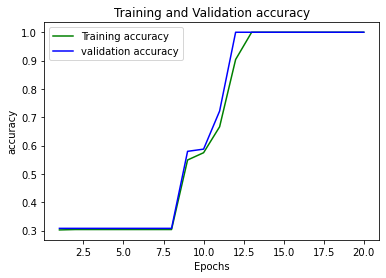

In [136]:
Acc_train_SGD = Network_Classifier_SGD.history['accuracy']
Acc_val_SGD = Network_Classifier_SGD.history['val_accuracy']
epochs = range(1,EPOCH+1)
plt.plot(epochs, Acc_train_SGD, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val_SGD, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()